In [1]:
using DataFrames, CSV
using Plots, StatsPlots, Statistics
using NamedArrays

In [2]:
using EcologicalNetworks

In [3]:
all_hp_data = filter(x -> occursin("Hadfield", x.Reference), web_of_life());

In [4]:
ids = getfield.(all_hp_data, :ID);
networks = web_of_life.(ids)

51-element Array{BipartiteQuantitativeNetwork{Int64,String},1}:
 18×10 bipartite quantitative ecological network (Int64, String) (L: 61) 
 24×18 bipartite quantitative ecological network (Int64, String) (L: 96) 
 9×23 bipartite quantitative ecological network (Int64, String) (L: 108) 
 21×6 bipartite quantitative ecological network (Int64, String) (L: 52)  
 13×7 bipartite quantitative ecological network (Int64, String) (L: 51)  
 37×16 bipartite quantitative ecological network (Int64, String) (L: 123)
 17×8 bipartite quantitative ecological network (Int64, String) (L: 43)  
 24×8 bipartite quantitative ecological network (Int64, String) (L: 37)  
 22×14 bipartite quantitative ecological network (Int64, String) (L: 97) 
 31×18 bipartite quantitative ecological network (Int64, String) (L: 88) 
 19×4 bipartite quantitative ecological network (Int64, String) (L: 43)  
 23×7 bipartite quantitative ecological network (Int64, String) (L: 63)  
 22×11 bipartite quantitative ecological network

In [5]:
N = reduce(union, convert.(BinaryNetwork, networks))

206×121 bipartite  ecological network (Bool, String) (L: 2131)

In [6]:
parasites, hosts = species(N, dims=1), species(N, dims=2);

In [7]:
M = NamedArray(zeros(size(N)...), (parasites, hosts))

206×121 Named Array{Float64,2}
                         A ╲ B │   …  
───────────────────────────────┼──────
Ctenophthalmus proximus        │   …  
Ctenophthalmus hypanis         │      
Ctenophthalmus inornatus       │      
Megabothris turbidus           │      
Ctenophthalmus shovi           │      
Amphipsylla rossica            │      
Myoxopsylla jordani            │      
Nosopsyllus fasciatus          │      
Leptopsylla segnis             │      
Leptopsylla taschenbergi       │      
Hystrichopsylla talpae         │      
Amphipsylla georgica           │      
⋮                                  ⋱  
Peromyscopsylla tikhomirovae   │      
Xenopsylla persica             │      
Nosopsyllus philippovi         │      
Phaenopsylla kopetdag          │      
Paradoxopsyllus microphthalmus │      
Amphipsylla argoi              │      
Phaenopsylla tiflovi           │      
Wagnerina tuvensis             │      
Ophthalmopsylla kukuschkini    │      
Xenopsylla nubica              │ 

In [8]:
networks_completed = NamedArray{Float64,2}[]

for (network, id) in zip(networks, ids)
    Y = similar(M)
    fill!(Y, 0.0)
    
    for p in species(network, dims=1)
        for h in species(network, dims=2)
            Y[p, h] = network[p, h]
        end
    end
    push!(networks_completed, Y)
end

In [9]:
networks_completed

51-element Array{NamedArray{Float64,2,AT,DT} where DT where AT,1}:
 206×121 Named Array{Float64,2}
                         A ╲ B │   …  
───────────────────────────────┼──────
Ctenophthalmus proximus        │   …  
Ctenophthalmus hypanis         │      
Ctenophthalmus inornatus       │      
Megabothris turbidus           │      
Ctenophthalmus shovi           │      
Amphipsylla rossica            │      
Myoxopsylla jordani            │      
Nosopsyllus fasciatus          │      
Leptopsylla segnis             │      
Leptopsylla taschenbergi       │      
Hystrichopsylla talpae         │      
Amphipsylla georgica           │      
⋮                                  ⋱  
Peromyscopsylla tikhomirovae   │      
Xenopsylla persica             │      
Nosopsyllus philippovi         │      
Phaenopsylla kopetdag          │      
Paradoxopsyllus microphthalmus │      
Amphipsylla argoi              │      
Phaenopsylla tiflovi           │      
Wagnerina tuvensis             │      
Opht

In [10]:
sum.(networks_completed)

51-element Array{Float64,1}:
   1728.0
   2012.0
   2001.0
   3241.0
   3578.0
  15841.0
    823.0
   2502.0
   5215.0
   6332.0
 115819.0
  41354.0
 127519.0
      ⋮  
  31485.0
   2197.0
   1610.0
   1936.0
   5011.0
   2229.0
 905886.0
   9245.0
   7821.0
   1019.0
  33626.0
   3075.0

In [11]:
using OTSIN, StatsBase

┌ Info: Recompiling stale cache file /Users/michielstock/.julia/compiled/v1.0/OTSIN/GYaVa.ji for OTSIN [7b885788-be81-11e9-3333-a562fe72c8d6]
└ @ Base loading.jl:1190


In [27]:
train_inds = sample(1:51, 26, replace=false)
test_inds = setdiff(1:51, train_inds);

In [28]:
Ps = [i in train_inds ? Y .+ 1e-4 : Y |> x -> x ./ sum(x) for (i, Y) in enumerate(networks_completed)]

51-element Array{NamedArray{Float64,2,Array{Float64,2},Tuple{OrderedCollections.OrderedDict{String,Int64},OrderedCollections.OrderedDict{String,Int64}}},1}:
 206×121 Named Array{Float64,2}
                         A ╲ B │   …  
───────────────────────────────┼──────
Ctenophthalmus proximus        │   …  
Ctenophthalmus hypanis         │      
Ctenophthalmus inornatus       │      
Megabothris turbidus           │      
Ctenophthalmus shovi           │      
Amphipsylla rossica            │      
Myoxopsylla jordani            │      
Nosopsyllus fasciatus          │      
Leptopsylla segnis             │      
Leptopsylla taschenbergi       │      
Hystrichopsylla talpae         │      
Amphipsylla georgica           │      
⋮                                  ⋱  
Peromyscopsylla tikhomirovae   │      
Xenopsylla persica             │      
Nosopsyllus philippovi         │      
Phaenopsylla kopetdag          │      
Paradoxopsyllus microphthalmus │      
Amphipsylla argoi              

In [ ]:
@time M = fitM(Matrix.(Ps[train_inds]), maxitter=10, γ=0.010)

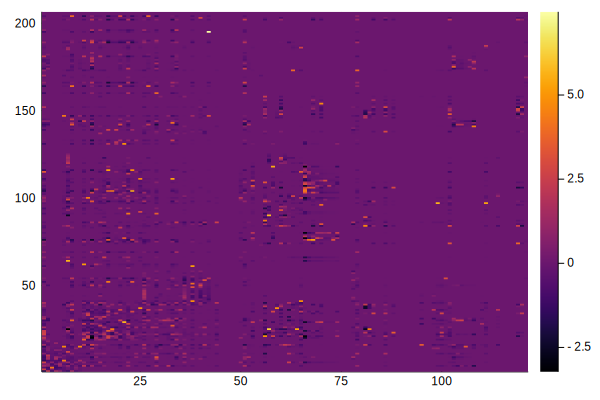

In [33]:
heatmap(M)

In [34]:
kl_ot_ab = Float64[]
kl_ot_a = Float64[]
kl_ot_b = Float64[]
kl_ot_softmax = Float64[]
kl_ot_neutral = Float64[]

cutoff = 1e-6  # remove sp. with no interactions

for P in Ps[test_inds]
    P = Matrix(P)
    a, b = marginals(P)
    # remove empty rows/columns
    P = P[a.>cutoff, b.>cutoff]
    Mss = M[a.>cutoff, b.>cutoff]
    a, b = marginals(P)
    # optimal transport both
    Q = optimaltransport(Mss, a, b)
    push!(kl_ot_ab, KL(P, Q))
    Q .= optimaltransport(Mss, a, nothing)
    push!(kl_ot_a, KL(P, Q))
    Q .= optimaltransport(Mss, nothing, b)
    push!(kl_ot_b, KL(P, Q))
    Q .= optimaltransport(Mss, nothing, nothing)
    push!(kl_ot_softmax, KL(P, Q))
    Q .= optimaltransport(a, b)
    push!(kl_ot_neutral, KL(P, Q))
end

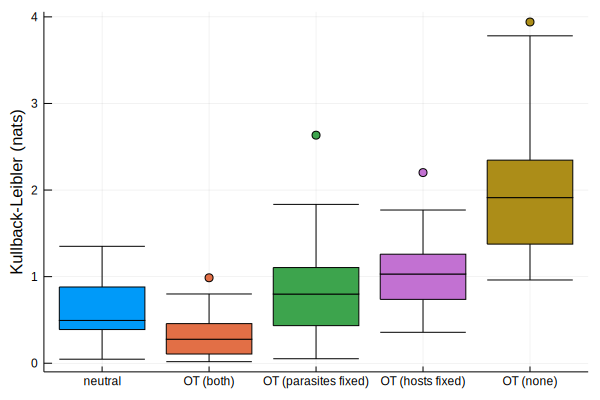

In [35]:
p_hp = boxplot(kl_ot_neutral, label="neutral", legend=:none)
boxplot!(kl_ot_ab, label="OT (both)")
boxplot!(kl_ot_a, label="OT (parasites fixed)")
boxplot!(kl_ot_b, label="OT (hosts fixed)")
boxplot!(kl_ot_softmax, label="OT (none)")
ylabel!("Kullback-Leibler (nats)")
xticks!(1:5, ["neutral", "OT (both)", "OT (parasites fixed)", "OT (hosts fixed)", "OT (none)"])

In [36]:
savefig(p_hp, "figures/hostparasite.svg")

In [37]:
Δkl = kl_ot_neutral - kl_ot_ab

25-element Array{Float64,1}:
  0.06521440658293409 
  0.25822221957386304 
  0.5927803645562739  
  0.7170492177309704  
  0.13432881019616472 
  0.2030742204840137  
  0.005309431287204847
  0.37187952681278835 
  0.697997371170632   
  0.18765527045725072 
 -0.22009658522210485 
 -0.018229430702844773
  0.8933397151388758  
  0.3668390490655695  
  0.016751323103961102
  0.892841193438354   
  0.44696863299270717 
  0.04684860523165302 
  0.37374112398249526 
  0.020069722914061394
  0.38949066731162096 
  0.03581650700367511 
  0.14313600701811868 
  0.024851728942154594
  0.4975051076964263  

In [38]:
mean(Δkl) / (std(Δkl) / √(length(Δkl)))

4.764579196389463

## Fitting networks one by one and pairwise comparison

In [33]:
γ = 1e-2

0.01

In [ ]:
Ms_ab = []

for P in Ps
    a, b = marginals(P)
    P = P[a.>0, b.>0]
    M_named = similar(P)
    M_named .= fitM(Matrix(P), γ=γ)
    push!(Ms_ab, M_named)
end

In [ ]:
using StatsBase

In [ ]:
n_datasets = length(Ms_ab)

correlations = Float64[]

for i in 1:n_datasets
    for j in (i+1):n_datasets
        Mi, Mj = Ms_ab[i], Ms_ab[j]
        ni, mi = names(Mi)
        nj, mj = names(Mj)
        n, m = intersect(ni, nj), intersect(mi, mj)
        if length(n) > 10 && length(m) > 10
            push!(correlations, cor(vec(Mi[n,m]), vec(Mj[n,m])))
        end
    end
end

In [ ]:
boxplot(filter(!isnan, correlations))

In [26]:
mean(filter(!isnan, correlations))

0.12974841847153315